In [ ]:
pip install geopandas


In [ ]:
#Import the required libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#Load the datasets
distribution_data = pd.read_csv('ev_distribution_dataset.csv')
distribution_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [ ]:
geospatial_data = pd.read_csv('geospatial_dataset.csv')
geospatial_data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


In [ ]:
weather_data = pd.read_csv('weather_dataset.csv')
weather_data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258


**Data Cleaning**

In [ ]:
distribution_data.info()

distribution_data.isnull().sum()

distribution_data.duplicated().sum()

distribution_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


,Electricity_Consumption (kWh),Number_of_EVs
count,500.000000,500.000000
mean,506.188554,5.240000
std,80.251238,2.577535
min,315.912577,1.000000
25%,439.978312,3.000000
50%,505.820872,5.000000
75%,557.230712,8.000000
max,718.980293,9.000000


In [ ]:
geospatial_data.info()

geospatial_data.isnull().sum()

geospatial_data.duplicated().sum()

geospatial_data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Substation_ID                    50 non-null     object
 1   Substation_Location              50 non-null     object
 2   Transmission_Line_Capacity (MW)  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


,Transmission_Line_Capacity (MW)
count,50.000000
mean,52.740000
std,24.857808
min,10.000000
25%,33.250000
50%,51.500000
75%,74.750000
max,94.000000


In [ ]:
weather_data.info()

weather_data.isnull().sum()

weather_data.duplicated().sum()

weather_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           97 non-null     object 
 1   Temperature (°C)    97 non-null     float64
 2   Precipitation (mm)  97 non-null     float64
 3   Weather_Conditions  97 non-null     object 
 4   Substation_ID       97 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.9+ KB


,Temperature (°C),Precipitation (mm)
count,97.000000,97.000000
mean,25.311668,2.542096
std,4.821917,1.396957
min,12.449425,0.007923
25%,22.245088,1.390244
50%,25.248302,2.688862
75%,28.902260,3.656106
max,34.104493,4.965771


**Exploratory Data Analysis**

**Univariate Analysis**

Visualize the distribution of elecricity consumption

Analyze the distribution of EV types, charging habits and customer type

**Bivariate Analysis**

Use geospatial data to visualize the locations of substations and EV charging stations

Analyze the capacity of transmission lines

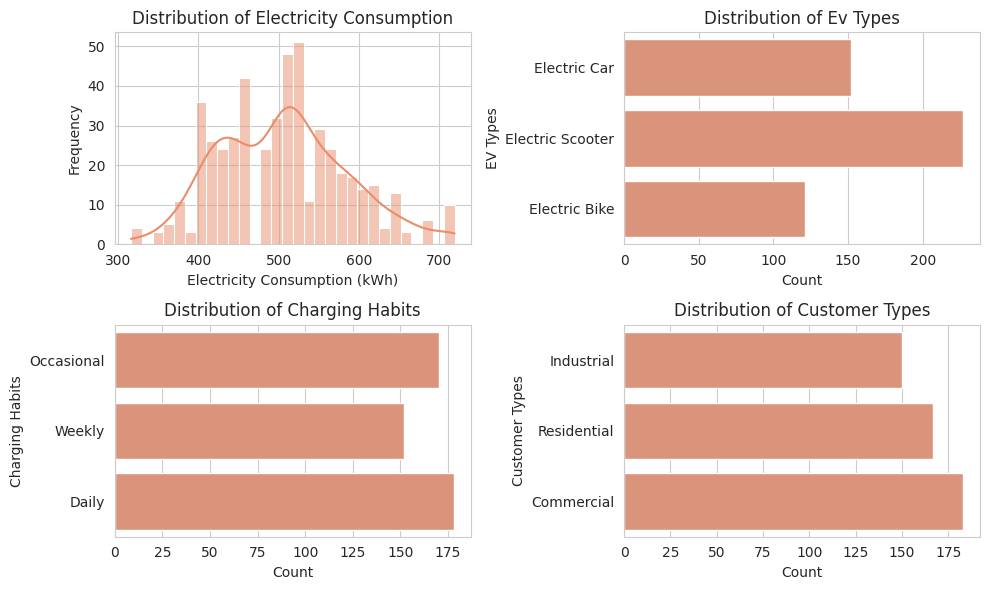

In [ ]:
from collections import Counter
#Univariate Analysis

#set the style and color palette of the plots
sns.set_style('whitegrid')
sns.set_palette("flare")

#Create a 2 by 2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

#plot distribution of electricity consumption
sns.histplot(distribution_data['Electricity_Consumption (kWh)'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Electricity Consumption')
axes[0, 0].set_xlabel('Electricity Consumption (kWh)')
axes[0, 0].set_ylabel('Frequency')

sns.countplot(data=distribution_data, y='EV_Type',  ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Ev Types')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('EV Types')

sns.countplot(data=distribution_data, y='Charging_Habit',  ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Charging Habits')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Charging Habits')

sns.countplot(data=distribution_data, y='Customer_Type',  ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Customer Types')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Customer Types')

plt.tight_layout()

plt.show()

In [ ]:
geospatial_data['substation_latitude'] = geospatial_data['Substation_Location'].apply \
(lambda x: float(x.split(',')[0].replace('(', '').strip()))
geospatial_data['substation_longitude'] = geospatial_data['Substation_Location'].apply \
(lambda x: float(x.split(',')[1].replace(')', '').strip()))

#drop the original location column
geospatial_data.drop('Substation_Location', axis=1, inplace=True)

geospatial_data.head()


,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude
0,Substation_907,40,57.258136,-70.905820
1,Substation_218,71,70.025385,-84.380572
2,Substation_339,85,80.393235,-75.797841
3,Substation_773,10,49.123078,-87.359890
4,Substation_349,40,66.798871,-86.511241


In [ ]:
distribution_data['EV_Charging_Station_Latitude'] = distribution_data['EV_Charging_Station_Location'].apply \
(lambda x: float(x.split(',')[0].replace('(', '').strip()))
distribution_data['EV_Charging_Station_Longitude'] = distribution_data['EV_Charging_Station_Location'].apply \
(lambda x: float(x.split(',')[1].replace(')', '').strip()))
#drop the original location column
distribution_data.drop('EV_Charging_Station_Location', axis=1, inplace=True)

distribution_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,EV_Charging_Station_Latitude,EV_Charging_Station_Longitude
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964


<ipython-input-28-0dfcc7e302be>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


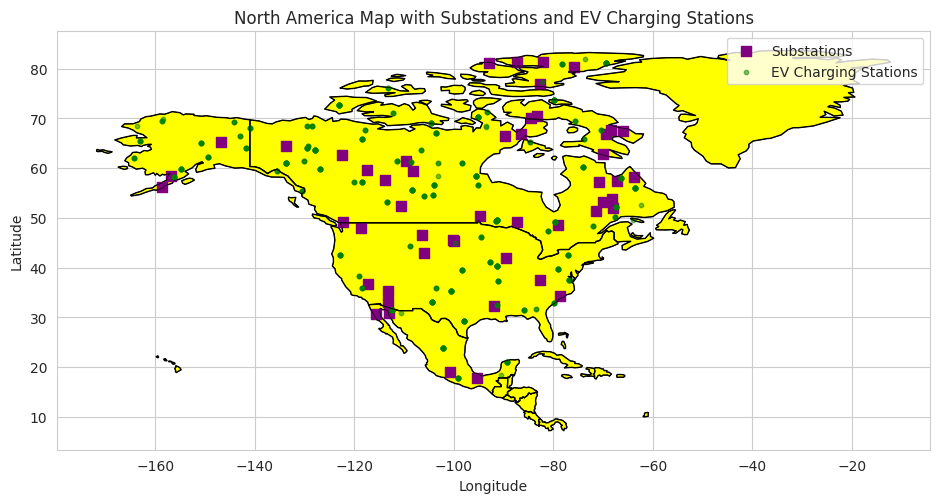

In [ ]:
#Convert the dataframes to Geodataframes
ev_distribution_gdf = gpd.GeoDataFrame(distribution_data, geometry=gpd.points_from_xy\
 (distribution_data.EV_Charging_Station_Longitude,\
  distribution_data.EV_Charging_Station_Latitude))
substation_gdf = gpd.GeoDataFrame(geospatial_data, geometry=gpd.points_from_xy\
 (geospatial_data.substation_longitude, geospatial_data.substation_latitude))

#Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Filter the map to North America
north_america = world[world['continent'] == 'North America']

#Plotting the map for north america
fig, ax = plt.subplots(figsize=(10, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='yellow', edgecolor='black')

#Plot the substations on the map
substation_gdf.plot(ax=ax, marker='s', markersize=50, color='purple',\
                    label='Substations')

#Plot ev stations on the map
ev_distribution_gdf.plot(ax=ax, markersize=10, color='green',\
                         label='EV Charging Stations', alpha=0.5)

plt.title('North America Map with Substations and EV Charging Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from shapely.geometry import LineString


<ipython-input-30-e4f4a966bc14>:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


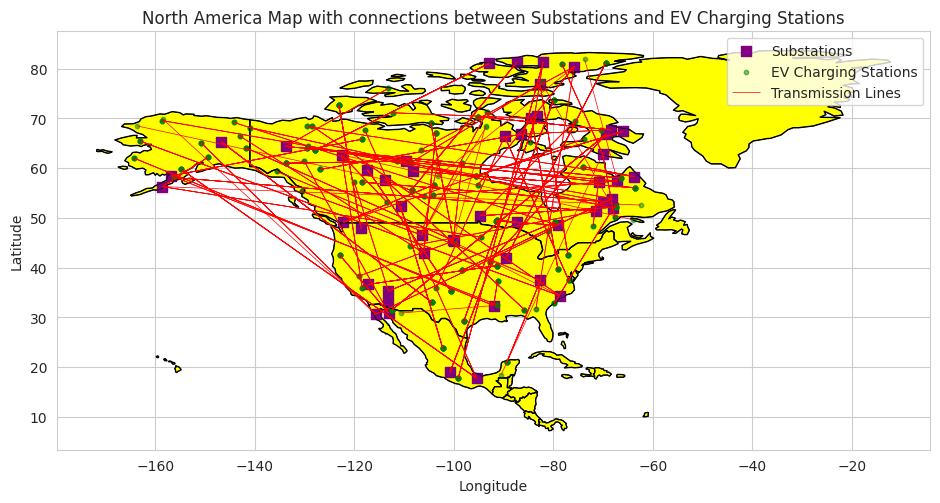

In [ ]:
ev_distribution_gdf = gpd.GeoDataFrame(distribution_data, geometry=gpd.points_from_xy\
 (distribution_data.EV_Charging_Station_Longitude,\
  distribution_data.EV_Charging_Station_Latitude))
substation_gdf = gpd.GeoDataFrame(geospatial_data, geometry=gpd.points_from_xy\
 (geospatial_data.substation_longitude, geospatial_data.substation_latitude))

#Create lines connecting each substation to it's associated EV Charging Stations
lines = []
for _, ev_row in distribution_data.iterrows():
  substation = geospatial_data[geospatial_data['Substation_ID'] == \
                               ev_row['Substation_ID']].iloc[0]
  line = [(ev_row['EV_Charging_Station_Longitude'], ev_row['EV_Charging_Station_Latitude']),
          (substation['substation_longitude'], substation['substation_latitude'])]
  lines.append(line)

line_gdf = gpd.GeoDataFrame(geometry=[LineString(line) for line in lines])

#Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Filter the map to North America
north_america = world[world['continent'] == 'North America']

#Plotting the map for north america
fig, ax = plt.subplots(figsize=(10, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='yellow', edgecolor='black')

#Plot the substations on the map
substation_gdf.plot(ax=ax, marker='s', markersize=50, color='purple',\
                    label='Substations')

#Plot ev stations on the map
ev_distribution_gdf.plot(ax=ax, markersize=10, color='green',\
                         label='EV Charging Stations', alpha=0.5)

#Plot line
line_gdf.plot(ax=ax, linewidth=0.5, color='red', label='Transmission Lines')

plt.title('North America Map with connections between Substations and EV Charging Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-49-58abb7f5a6a3>:27: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


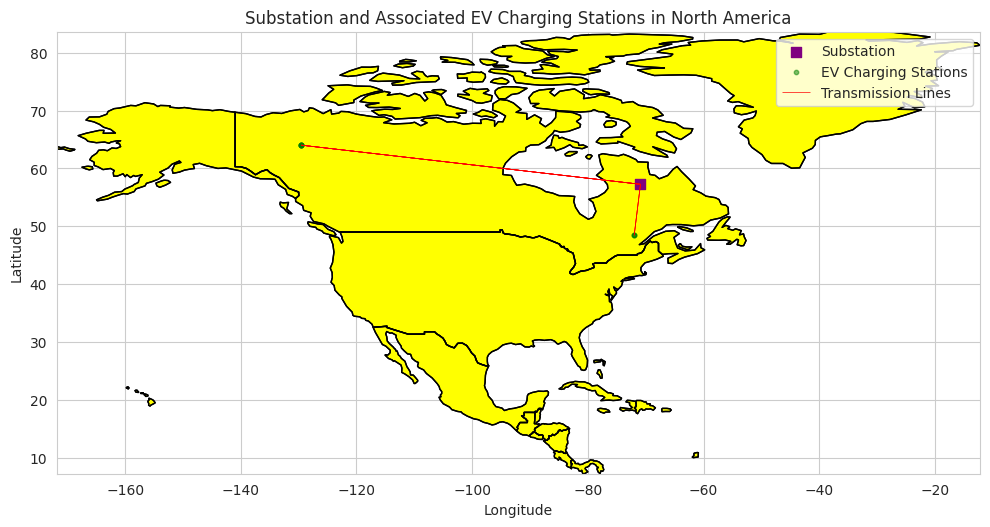

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Zoom in and the connection of substation 1 to EV Charging Stations

# Filter to the first substation
substation_sel = geospatial_data.iloc[0]
associated_ev_stations = distribution_data[distribution_data['Substation_ID'] == substation_sel['Substation_ID']]

# Convert to GeoDataFrames
ev_gdf_sel = gpd.GeoDataFrame(associated_ev_stations, geometry=gpd.points_from_xy(
    associated_ev_stations.EV_Charging_Station_Longitude,
    associated_ev_stations.EV_Charging_Station_Latitude))

substation_gdf_sel = gpd.GeoDataFrame(substation_sel.to_frame().transpose(), geometry=gpd.points_from_xy(
    [substation_sel.substation_longitude],
    [substation_sel.substation_latitude]))

lines_selected = [(ev_row['EV_Charging_Station_Longitude'], ev_row['EV_Charging_Station_Latitude'],
                   substation_sel['substation_longitude'], substation_sel['substation_latitude'])
                  for _, ev_row in associated_ev_stations.iterrows()]

lines_gdf_sel = gpd.GeoDataFrame(geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected])

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the map to North America
north_america = world[world['continent'] == 'North America']

# Determining the boundary box for North America
xlim = [north_america.total_bounds[0], north_america.total_bounds[2]]
ylim = [north_america.total_bounds[1], north_america.total_bounds[3]]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(10, 7))
north_america.boundary.plot(ax=ax, linewidth=1, color='black')
north_america.plot(ax=ax, color='yellow', edgecolor='black')

# Plot the substations on the map
substation_gdf_sel.plot(ax=ax, marker='s', markersize=50, color='purple', label='Substation')

# Plot EV stations on the map
ev_gdf_sel.plot(ax=ax, markersize=10, color='green', label='EV Charging Stations', alpha=0.5)

# Plot lines
lines_gdf_sel.plot(ax=ax, linewidth=0.5, color='red', label='Transmission Lines')

# Set the limits to the entire North America
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title(f"Substation and Associated EV Charging Stations in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-51-41492ae53145>:27: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


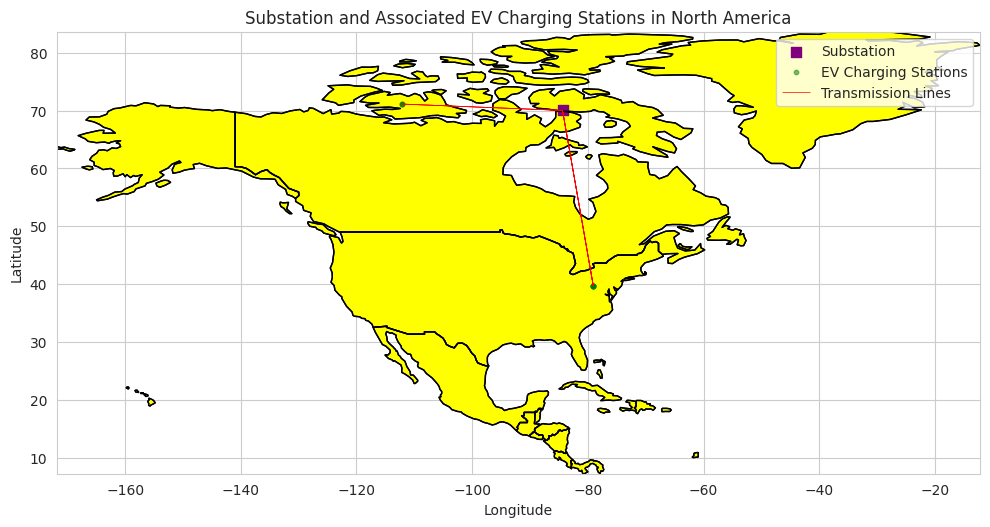

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Zoom in and the connection of substation 1 to EV Charging Stations

# Filter to the first substation
substation_sel = geospatial_data.iloc[1]
associated_ev_stations = distribution_data[distribution_data['Substation_ID'] == substation_sel['Substation_ID']]

# Convert to GeoDataFrames
ev_gdf_sel = gpd.GeoDataFrame(associated_ev_stations, geometry=gpd.points_from_xy(
    associated_ev_stations.EV_Charging_Station_Longitude,
    associated_ev_stations.EV_Charging_Station_Latitude))

substation_gdf_sel = gpd.GeoDataFrame(substation_sel.to_frame().transpose(), geometry=gpd.points_from_xy(
    [substation_sel.substation_longitude],
    [substation_sel.substation_latitude]))

lines_selected = [(ev_row['EV_Charging_Station_Longitude'], ev_row['EV_Charging_Station_Latitude'],
                   substation_sel['substation_longitude'], substation_sel['substation_latitude'])
                  for _, ev_row in associated_ev_stations.iterrows()]

lines_gdf_sel = gpd.GeoDataFrame(geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected])

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the map to North America
north_america = world[world['continent'] == 'North America']

# Determining the boundary box for North America
xlim = [north_america.total_bounds[0], north_america.total_bounds[2]]
ylim = [north_america.total_bounds[1], north_america.total_bounds[3]]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(10, 7))
north_america.boundary.plot(ax=ax, linewidth=1, color='black')
north_america.plot(ax=ax, color='yellow', edgecolor='black')

# Plot the substations on the map
substation_gdf_sel.plot(ax=ax, marker='s', markersize=50, color='purple', label='Substation')

# Plot EV stations on the map
ev_gdf_sel.plot(ax=ax, markersize=10, color='green', label='EV Charging Stations', alpha=0.5)

# Plot lines
lines_gdf_sel.plot(ax=ax, linewidth=0.5, color='red', label='Transmission Lines')

# Set the limits to the entire North America
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title(f"Substation and Associated EV Charging Stations in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-52-58abb7f5a6a3>:27: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


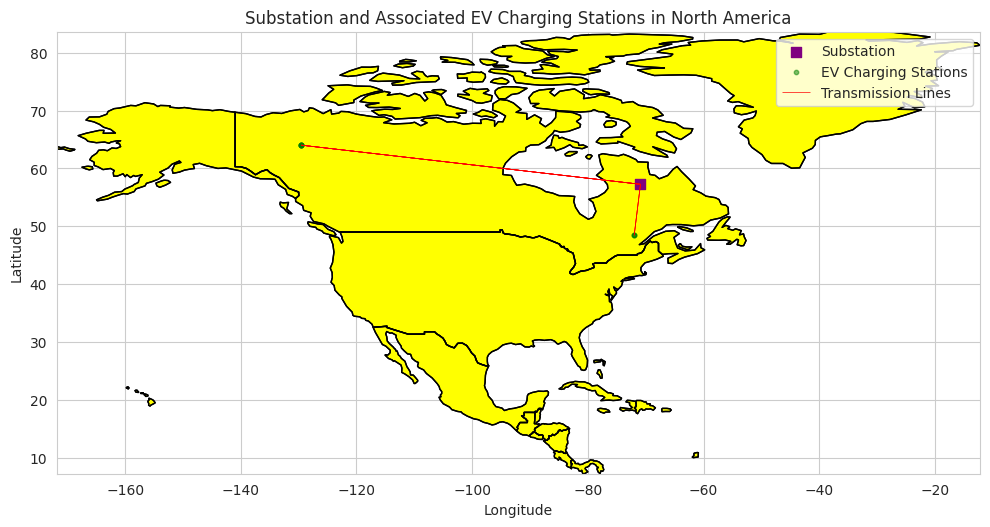

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Zoom in and the connection of substation 1 to EV Charging Stations

# Filter to the first substation
substation_sel = geospatial_data.iloc[0]
associated_ev_stations = distribution_data[distribution_data['Substation_ID'] == substation_sel['Substation_ID']]

# Convert to GeoDataFrames
ev_gdf_sel = gpd.GeoDataFrame(associated_ev_stations, geometry=gpd.points_from_xy(
    associated_ev_stations.EV_Charging_Station_Longitude,
    associated_ev_stations.EV_Charging_Station_Latitude))

substation_gdf_sel = gpd.GeoDataFrame(substation_sel.to_frame().transpose(), geometry=gpd.points_from_xy(
    [substation_sel.substation_longitude],
    [substation_sel.substation_latitude]))

lines_selected = [(ev_row['EV_Charging_Station_Longitude'], ev_row['EV_Charging_Station_Latitude'],
                   substation_sel['substation_longitude'], substation_sel['substation_latitude'])
                  for _, ev_row in associated_ev_stations.iterrows()]

lines_gdf_sel = gpd.GeoDataFrame(geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected])

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the map to North America
north_america = world[world['continent'] == 'North America']

# Determining the boundary box for North America
xlim = [north_america.total_bounds[0], north_america.total_bounds[2]]
ylim = [north_america.total_bounds[1], north_america.total_bounds[3]]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(10, 7))
north_america.boundary.plot(ax=ax, linewidth=1, color='black')
north_america.plot(ax=ax, color='yellow', edgecolor='black')

# Plot the substations on the map
substation_gdf_sel.plot(ax=ax, marker='s', markersize=50, color='purple', label='Substation')

# Plot EV stations on the map
ev_gdf_sel.plot(ax=ax, markersize=10, color='green', label='EV Charging Stations', alpha=0.5)

# Plot lines
lines_gdf_sel.plot(ax=ax, linewidth=0.5, color='red', label='Transmission Lines')

# Set the limits to the entire North America
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title(f"Substation and Associated EV Charging Stations in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-44-aa6e515207c0>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


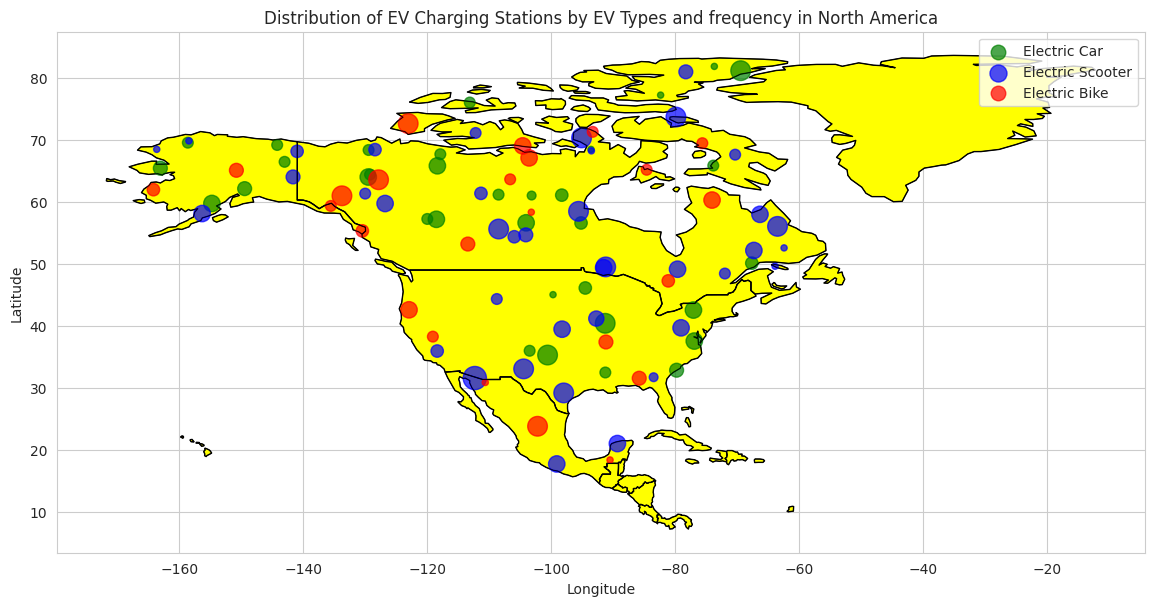

In [ ]:
#Groupby location and EV Type
#Count the number of stations

grouped_data = distribution_data.groupby(['EV_Charging_Station_Latitude', 'EV_Charging_Station_Longitude', 'EV_Type']).size().reset_index(name='Count')

#Convert grouped data to GeoDataFrame
grouped_dframe = gpd.GeoDataFrame(grouped_data, geometry=gpd.points_from_xy(grouped_data.EV_Charging_Station_Longitude, grouped_data.EV_Charging_Station_Latitude))

#Load world data and filter for North America
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
north_america = world[world['continent'] == 'North America']

#Plotting the map for north america
fig, ax = plt.subplots(figsize=(12, 6))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='yellow', edgecolor='black')

#Define the colors of ev type
colors = {'Electric Car': 'green', 'Electric Scooter': 'blue', 'Electric Bike': 'red'}

#Plotting ev type
for ev_type, color in colors.items():
  ev_type_data = grouped_dframe[grouped_dframe['EV_Type'] == ev_type]
  ev_type_data.plot(ax=ax, markersize=ev_type_data['Count']*20, color=color, label=ev_type, alpha=0.7)


#Set title and axis labels
plt.title('Distribution of EV Charging Stations by EV Types and frequency in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


**Network Capacity Assessment**

1) Calculate the total electricity consumption for each station

2) Compare the total electricity consumption with the transmission line capacity


In [ ]:
#Group the EV distribution data by substation and calculate the total electricity consumption for each substation
tc_per_substation = distribution_data.groupby('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()

#Merge the total consumption data with the geospatial data
network_capacity_data = pd.merge( geospatial_data, tc_per_substation, on='Substation_ID')

#Rename the electricity consumption column
network_capacity_data.rename(columns={'Electricity_Consumption (kWh)': 'Total_Electricity_Consumption'}, inplace=True)

#Calculate the ratio of total consumption to the transmission line capacity
# 1 MW = I000 kWh

network_capacity_data['Consumption_to_Capacity_Ratio'] = network_capacity_data['Total_Electricity_Consumption'] / \
(network_capacity_data['Transmission_Line_Capacity (MW)'] * 1000)

network_capacity_data

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Electricity_Consumption,Consumption_to_Capacity_Ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,0.166594
1,Substation_218,71,70.025385,-84.380572,5997.437051,0.084471
2,Substation_339,85,80.393235,-75.797841,4536.778685,0.053374
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
4,Substation_349,40,66.798871,-86.511241,4901.836555,0.122546
5,Substation_752,33,81.295968,-87.304226,5935.678393,0.179869
6,Substation_294,35,52.421521,-110.699042,4010.395180,0.114583
7,Substation_301,20,30.873564,-113.079468,4738.530994,0.236927
8,Substation_443,60,62.832107,-70.090111,5673.039047,0.094551
9,Substation_996,65,81.330310,-82.055755,4941.446087,0.076022


In [ ]:
from shapely.geometry import Point

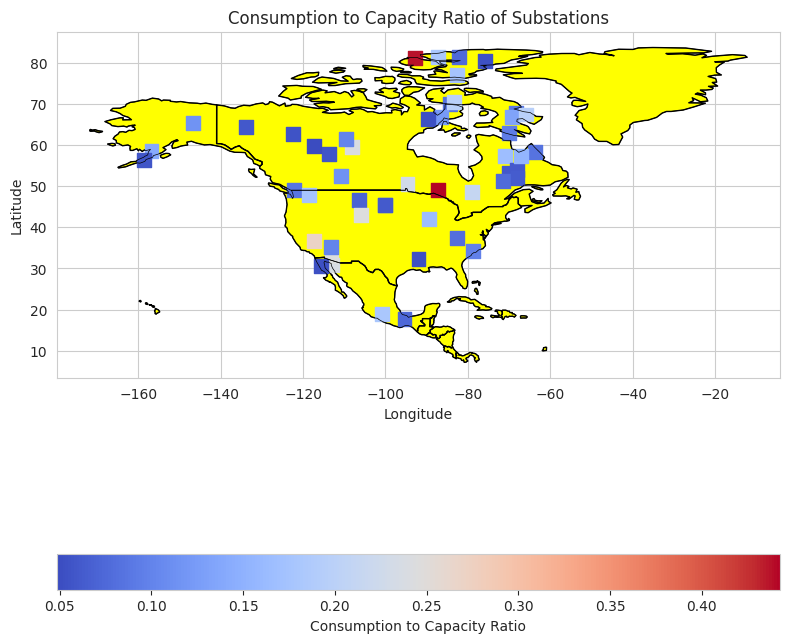

In [ ]:
#Create the GeoDataFrame for the network capacity for the dataframes

geo_network_capacity = [Point(lon, lat) for lon, lat in zip(network_capacity_data['substation_longitude'], network_capacity_data['substation_latitude'])]

network_capacity_gdf = gpd.GeoDataFrame(network_capacity_data, geometry=geo_network_capacity)

#Plot
fig, ax = plt.subplots(figsize=(8, 12))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='yellow', edgecolor='black')

#Plot the substations on the map
network_capacity_gdf.plot(column='Consumption_to_Capacity_Ratio', cmap='coolwarm', legend=True, ax=ax, marker='s', markersize=100, legend_kwds={'label': "Consumption to Capacity Ratio", 'orientation': "horizontal"})

ax.set_title('Consumption to Capacity Ratio of Substations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.tight_layout()
plt.show()

In [ ]:
#Groupby the subststion_id for the number of EVs

ev_counts = distribution_data.groupby('Substation_ID')['Number_of_EVs'].sum().reset_index()

#Merge the network capacity data with the EV counts

final_data = pd.merge(network_capacity_data, ev_counts, on='Substation_ID')

#Correlation
correlation_ratio = final_data['Consumption_to_Capacity_Ratio'].corr(final_data['Number_of_EVs'])

correlation_ratio

-0.10944923035990643

Text(0.5, 1.0, 'Correlation between Number of EVs and Consumption to Capacity Ratio')

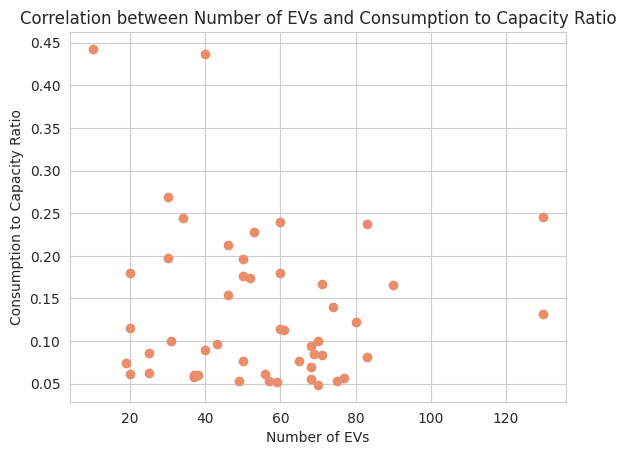

In [ ]:
#Visualize the correlation

plt.figsize=(8, 6)
plt.scatter(final_data['Number_of_EVs'], final_data['Consumption_to_Capacity_Ratio'])
plt.xlabel('Number of EVs')
plt.ylabel('Consumption to Capacity Ratio')
plt.title('Correlation between Number of EVs and Consumption to Capacity Ratio')




```
### **Identifying Bottlenecks**
Areas where consumption is high compared to the number of EV**
```



In [ ]:
#Filter consumption to capacity ratio graeter than 1
bottlenecks = final_data[final_data['Consumption_to_Capacity_Ratio'] > 1]
bottlenecks

#No bottlenecks

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Electricity_Consumption,Consumption_to_Capacity_Ratio,Number_of_EVs


In [ ]:
top_5_substations = network_capacity_data.nlargest(5, 'Consumption_to_Capacity_Ratio')
top_5_substations

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Electricity_Consumption,Consumption_to_Capacity_Ratio
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
14,Substation_87,12,81.031814,-92.941747,5243.800714,0.436983
27,Substation_711,17,36.618181,-117.277556,4579.354677,0.269374
20,Substation_11,43,33.082269,-113.118931,10534.827701,0.244996
42,Substation_258,22,42.952789,-106.049333,5378.214378,0.244464


**Correlation with Weather Data**

Analyzing correlation between weather data and electricity consumption can provide insights into how conditions affect the distribution network

In [ ]:
#Merge weather data with distribution data

merged_data = pd.merge(distribution_data, weather_data, on=['Timestamp', 'Substation_ID'])

merged_data.head()

#Calculate the correlation between weather condition and electricity consumption
correlation_weather = merged_data[['Electricity_Consumption (kWh)', 'Temperature (°C)', 'Precipitation (mm)']].corr()

correlation_weather

,Electricity_Consumption (kWh),Temperature (°C),Precipitation (mm)
Electricity_Consumption (kWh),1.000000,0.131543,0.085014
Temperature (°C),0.131543,1.000000,-0.005828
Precipitation (mm),0.085014,-0.005828,1.000000


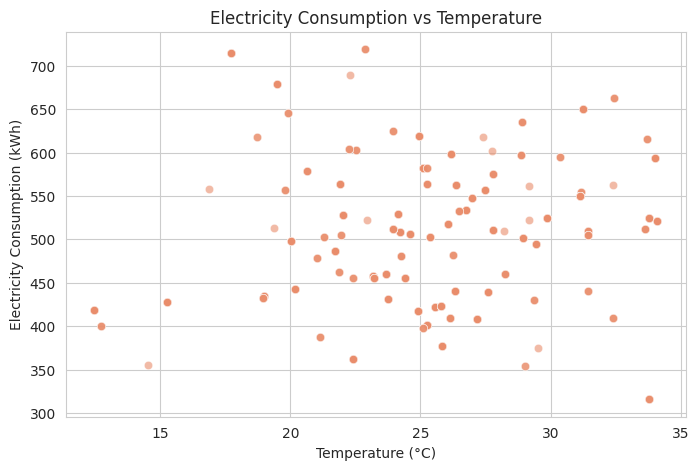

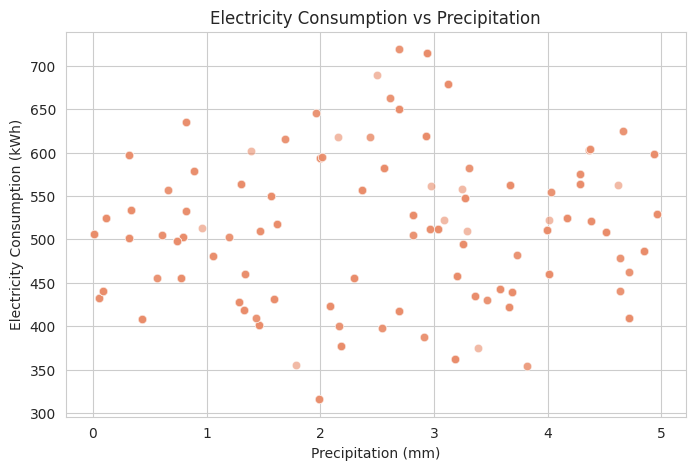

In [ ]:
# @title Electricity_Consumption (kWh) vs Temperature (°C)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data, x='Temperature (°C)', y='Electricity_Consumption (kWh)', alpha=0.6)

plt.title('Electricity Consumption vs Temperature')
plt.ylabel('Electricity Consumption (kWh)')
plt.xlabel('Temperature (°C)')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data, x='Precipitation (mm)', y='Electricity_Consumption (kWh)', alpha=0.6)

plt.title('Electricity Consumption vs Precipitation')
plt.ylabel('Electricity Consumption (kWh)')
plt.xlabel('Precipitation (mm)')
plt.show()